[Home](../../README.md)

### Model Training - Polynominal Regression

Linear regression assumes the data has a linear pattern. If your data does not have a linear pattern you can consider a polynomial regression algorithm that provides a multi (poly) coefficient linear relationship between an independent variable and a dependent variable to predict the outcome of future events. We will now Train a Polynomial regression algorithm on the features you have engineered to see how closely we can predict the health outcomes for individuals.

#### Step 1

Load the required dependencies:

In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

#### Step 2

Store the data columns for Polynominal Regression.

In [2]:
# Create a data frame from the csv file
training_data = pd.read_csv('2.3.2.training_data.csv')

x_name = ['ComfortIndexScaled','HourDPT%','Temp','DewPointTemp','WindSpeed','Rainfall','RushHour']
y_name = 'Count'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

#### Step 3

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

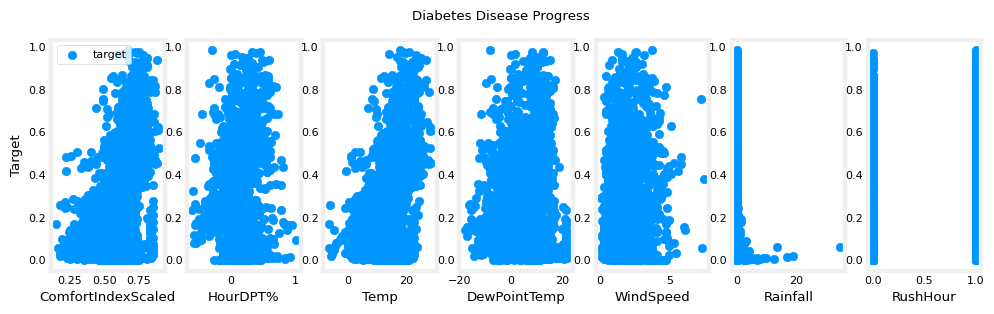

In [3]:
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()

#### Step 4

Then save an instance of PolynomialFeatures, adjust the 'degree' parameter to suit your model and create the feature using the data in 'x'. (Note a degree of 1 is linear regression, each extra degree adds a coefficient).

Then use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.*

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model (default name from template)
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

LinearRegression()

#### Step 5

Plot the features, targets and model.

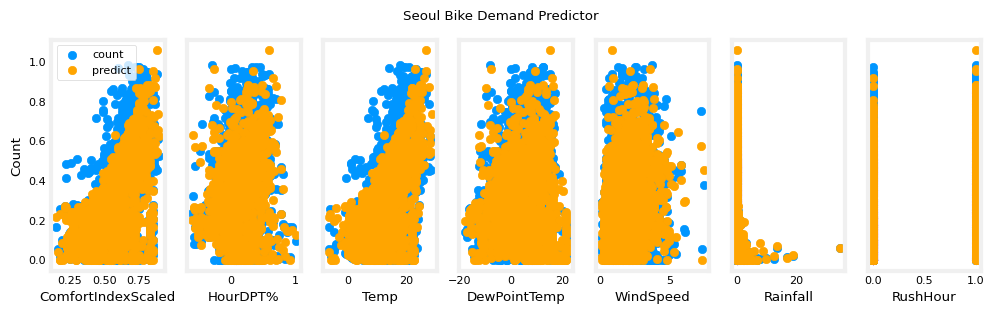

In [17]:
y_pred = my_model.predict(poly_features)
y_pred = np.maximum(0, y_pred)

if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Seoul Bike Demand Predictor")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'count')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Count"); ax[0].legend();
    fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

* Polynominal regression later discussed [here](2.model_development/2.4.model_testing_and_validation/2.4.1.model_evaluation.ipynb)

In [13]:
# save the model to disk
filename = 'my_saved_model_v3.sav'
pickle.dump(my_model, open('../2.4.model_testing_and_validation/' + filename, 'wb'))